In [1]:
!git clone https://github.com/sanskritiagr/Hedging-of-Financial-Derivatives.git
%cd Hedging-of-Financial-Derivatives


C:\Users\sansk\Downloads\Projects\Hedging-of-Financial-Derivatives-main\Hedging-of-Financial-Derivatives-main\Facebook Prophet\Hedging-of-Financial-Derivatives


fatal: destination path 'Hedging-of-Financial-Derivatives' already exists and is not an empty directory.


In [2]:
import warnings;
warnings.simplefilter('ignore')

In [3]:
#pip install pystan prophet

In [57]:
import yfinance as yf

data = yf.download('^NSEI', start='2020-01-01', end='2024-05-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


<Axes: >

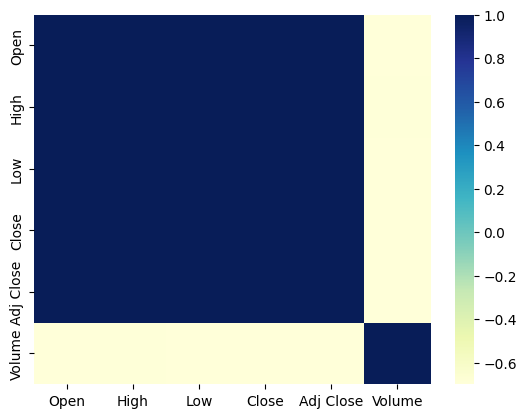

In [58]:
import seaborn as sns

sns.heatmap(data.corr(), cmap="YlGnBu")

In [59]:
df=data.filter(items=['Date','Close'])
df.tail()

,Close
Date,
2024-04-24,22402.400391
2024-04-25,22570.349609
2024-04-26,22419.949219
2024-04-29,22643.400391
2024-04-30,22604.849609


In [60]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='Date'>

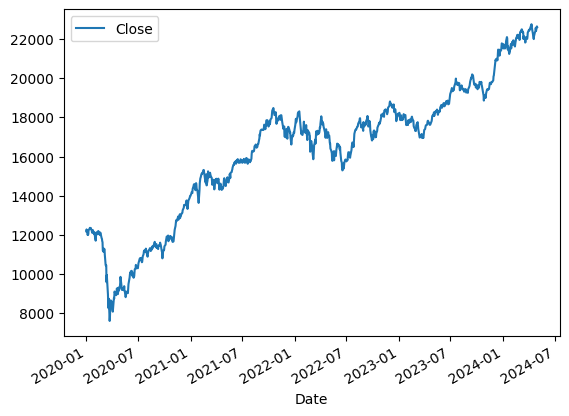

In [61]:
df.plot()

In [62]:
df.columns

Index(['Close'], dtype='object')

In [63]:
df = df.rename_axis('Date').reset_index() #to use the first column Date as a column
# df.columns = ['ds','y']
df.head()

,Date,Close
0,2020-01-01,12182.500000
1,2020-01-02,12282.200195
2,2020-01-03,12226.650391
3,2020-01-06,11993.049805
4,2020-01-07,12052.950195


In [64]:
df.dropna()

,Date,Close
0,2020-01-01,12182.500000
1,2020-01-02,12282.200195
2,2020-01-03,12226.650391
3,2020-01-06,11993.049805
4,2020-01-07,12052.950195
...,...,...
1066,2024-04-24,22402.400391
1067,2024-04-25,22570.349609
1068,2024-04-26,22419.949219
1069,2024-04-29,22643.400391


In [65]:
df['Date'] = pd.to_datetime(df['Date'])

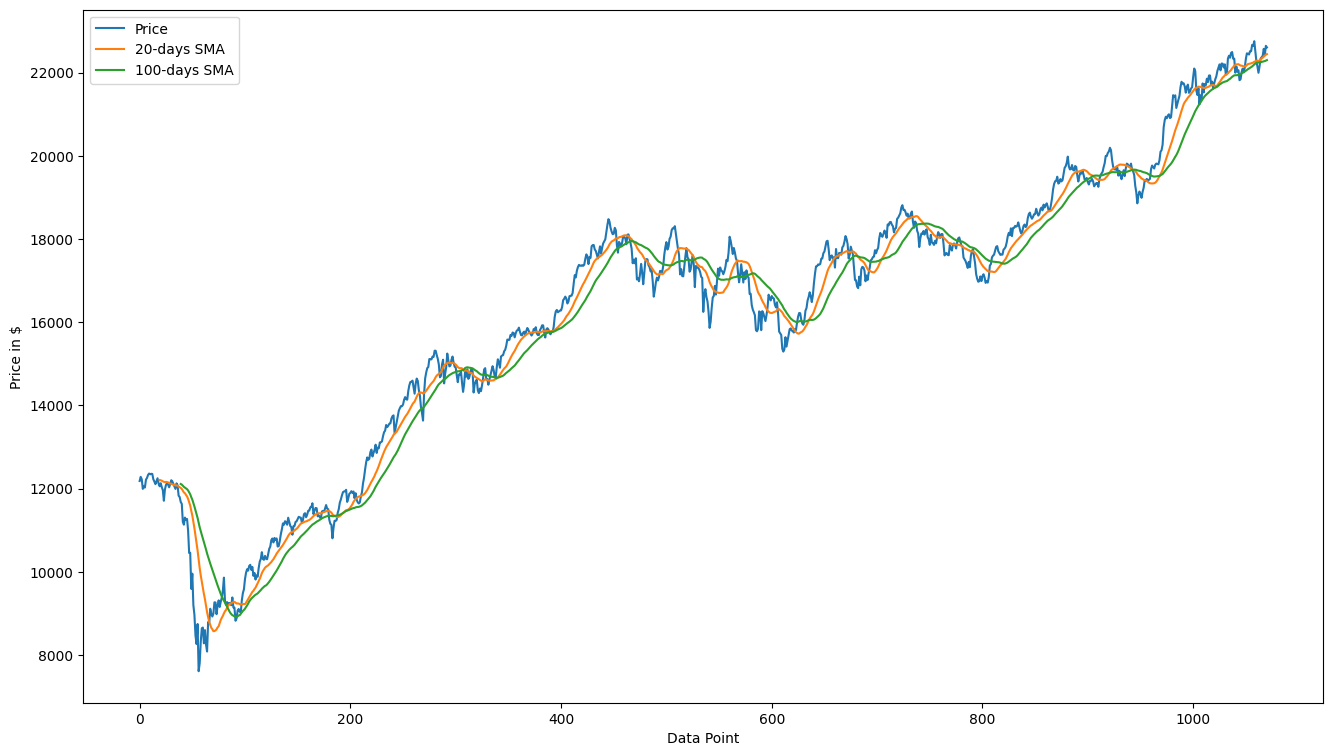

In [66]:
df['20MA'] = df['Close'].rolling(window=20).mean()
df['100MA'] = df['Close'].rolling(window=40).mean()

fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(df.index, df['Close'], label='Price')
ax.plot(df.index, df['20MA'], label='20-days SMA')
ax.plot(df.index, df['100MA'], label='100-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.set_xlabel('Data Point')

plt.show()

In [67]:
df.head()

,Date,Close,20MA,100MA
0,2020-01-01,12182.500000,NaN,NaN
1,2020-01-02,12282.200195,NaN,NaN
2,2020-01-03,12226.650391,NaN,NaN
3,2020-01-06,11993.049805,NaN,NaN
4,2020-01-07,12052.950195,NaN,NaN


In [68]:
df1 = df[['Date','Close']]


In [37]:
model= prophet.Prophet()
df1.columns = ['ds','y']
df1.dropna(axis=0,inplace=True)

In [38]:
model.fit(df1)

01:57:25 - cmdstanpy - INFO - Chain [1] start processing
01:57:26 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
future_dates=model.make_future_dataframe(periods=365)
future_dates.tail()

,ds
1392,2025-04-26
1393,2025-04-27
1394,2025-04-28
1395,2025-04-29
1396,2025-04-30


In [40]:
prediction=model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-26,9814.055584,9419.637867,10517.457029,9814.055584,9814.055584,180.418954,180.418954,180.418954,-335.683315,-335.683315,-335.683315,516.102270,516.102270,516.102270,0.0,0.0,0.0,9994.474538
1,2020-02-27,9810.902579,9397.920847,10521.495839,9810.902579,9810.902579,151.271664,151.271664,151.271664,-353.447075,-353.447075,-353.447075,504.718739,504.718739,504.718739,0.0,0.0,0.0,9962.174243
2,2020-02-28,9807.749573,9379.361537,10491.005993,9807.749573,9807.749573,117.629673,117.629673,117.629673,-372.170883,-372.170883,-372.170883,489.800556,489.800556,489.800556,0.0,0.0,0.0,9925.379247
3,2020-03-02,9798.290557,9318.894930,10408.285003,9798.290557,9798.290557,47.637311,47.637311,47.637311,-377.627104,-377.627104,-377.627104,425.264415,425.264415,425.264415,0.0,0.0,0.0,9845.927868
4,2020-03-03,9795.137552,9294.887419,10380.038659,9795.137552,9795.137552,46.801643,46.801643,46.801643,-351.084162,-351.084162,-351.084162,397.885804,397.885804,397.885804,0.0,0.0,0.0,9841.939195


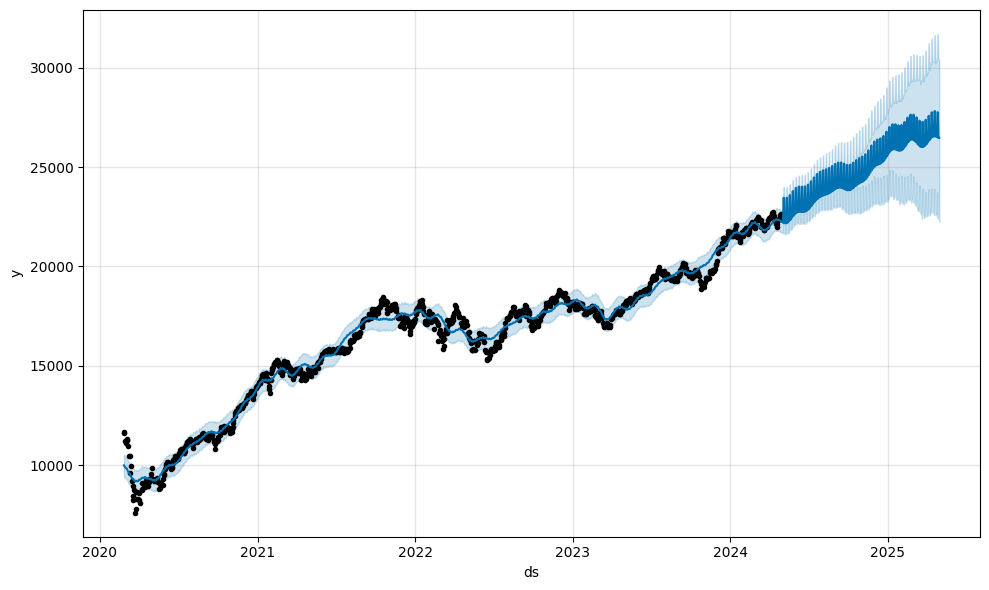

In [41]:

model.plot(prediction);

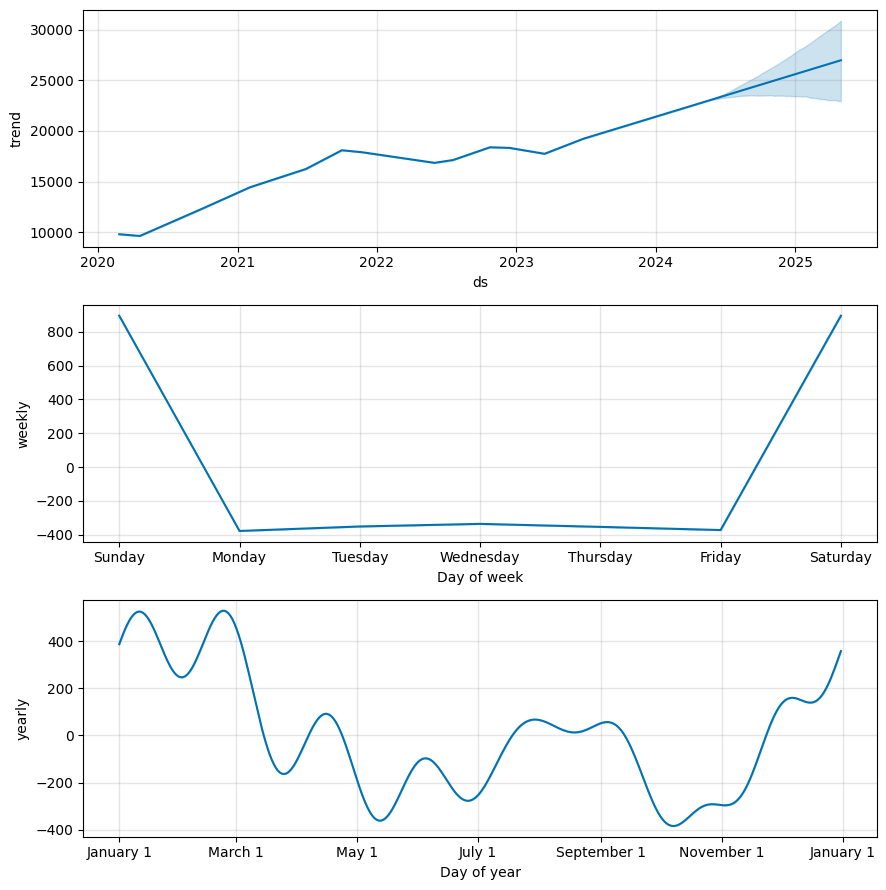

In [42]:
model.plot_components(prediction);

In [45]:
df1.head()

,ds,y
39,2020-02-26,11678.500000
40,2020-02-27,11633.299805
41,2020-02-28,11201.750000
42,2020-03-02,11132.750000
43,2020-03-03,11303.299805


In [46]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='1000 days', period='70 days', horizon = '365 days')
df_cv.head()

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]01:57:42 - cmdstanpy - INFO - Chain [1] start processing
01:57:42 - cmdstanpy - INFO - Chain [1] done processing
 33%|████████████████████████████                                                        | 1/3 [00:00<00:01,  1.97it/s]01:57:43 - cmdstanpy - INFO - Chain [1] start processing
01:57:43 - cmdstanpy - INFO - Chain [1] done processing
 67%|████████████████████████████████████████████████████████                            | 2/3 [00:01<00:00,  1.93it/s]01:57:43 - cmdstanpy - INFO - Chain [1] start processing
01:57:43 - cmdstanpy - INFO - Chain [1] done processing
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.94it/s]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-12-13,18274.336529,17745.034746,18830.363292,18608.000000,2022-12-12
1,2022-12-14,18299.493250,17751.734655,18833.379754,18660.300781,2022-12-12
2,2022-12-15,18277.033318,17731.841212,18793.147521,18414.900391,2022-12-12
3,2022-12-16,18246.485225,17692.901138,18851.134793,18269.000000,2022-12-12
4,2022-12-19,18247.966139,17737.928602,18792.148866,18420.449219,2022-12-12


In [47]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days,770684.826317,877.886568,786.850361,0.043697,0.047201,0.043890,0.333333
1,36 days,790340.553836,889.010998,798.853265,0.044362,0.047367,0.044533,0.324201
2,37 days,804697.798899,897.049496,806.844306,0.044776,0.052486,0.044940,0.324201
3,38 days,820785.342574,905.972043,818.438277,0.045385,0.052569,0.045541,0.315068
4,39 days,832032.941834,912.158397,824.228070,0.045667,0.054620,0.045813,0.315068


In [48]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days,770684.826317,877.886568,786.850361,0.043697,0.047201,0.043890,0.333333
1,36 days,790340.553836,889.010998,798.853265,0.044362,0.047367,0.044533,0.324201
2,37 days,804697.798899,897.049496,806.844306,0.044776,0.052486,0.044940,0.324201
3,38 days,820785.342574,905.972043,818.438277,0.045385,0.052569,0.045541,0.315068
4,39 days,832032.941834,912.158397,824.228070,0.045667,0.054620,0.045813,0.315068


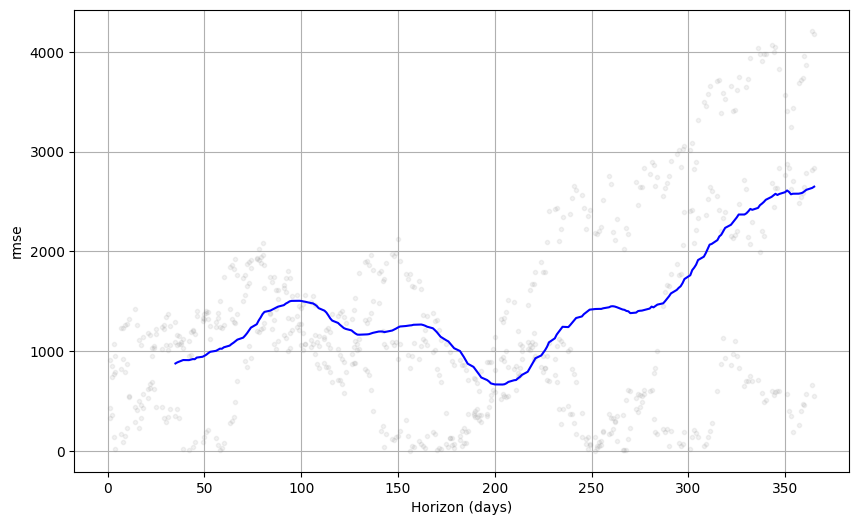

In [49]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [69]:
# df.reset_index(inplace=True)
df.columns

Index(['Date', 'Close', '20MA', '100MA'], dtype='object')

In [70]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
test_data.shape

(215, 4)

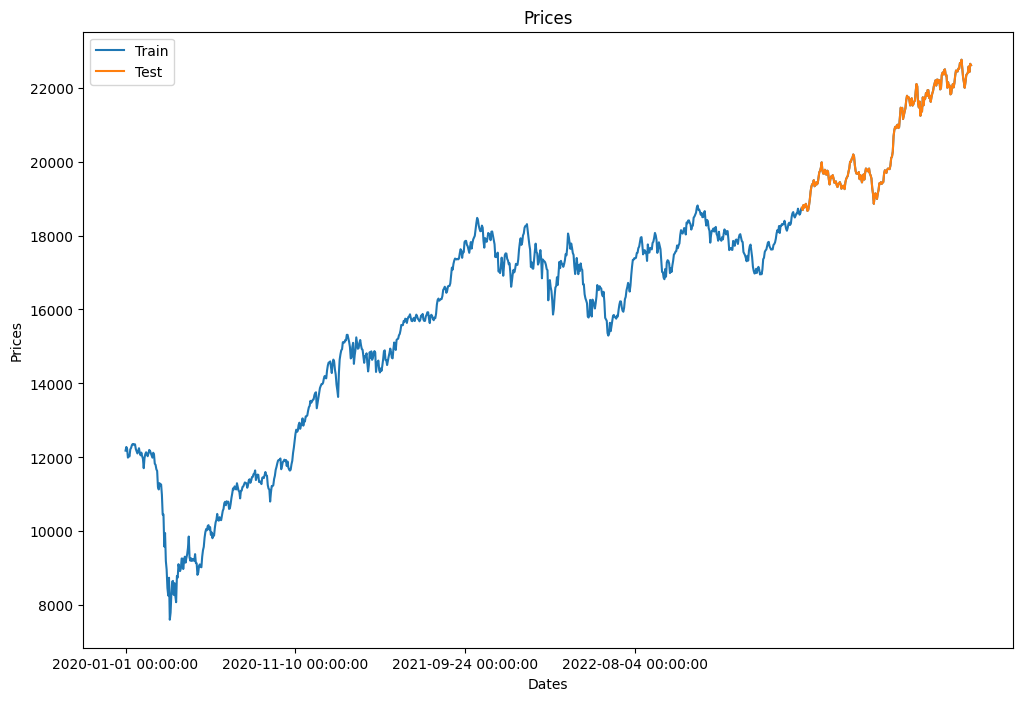

In [71]:
import numpy as np
plt.figure(figsize=(12,8))
plt.title('Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.xticks(np.arange(0,856, 215), df['Date'][0:856:215])
plt.legend()

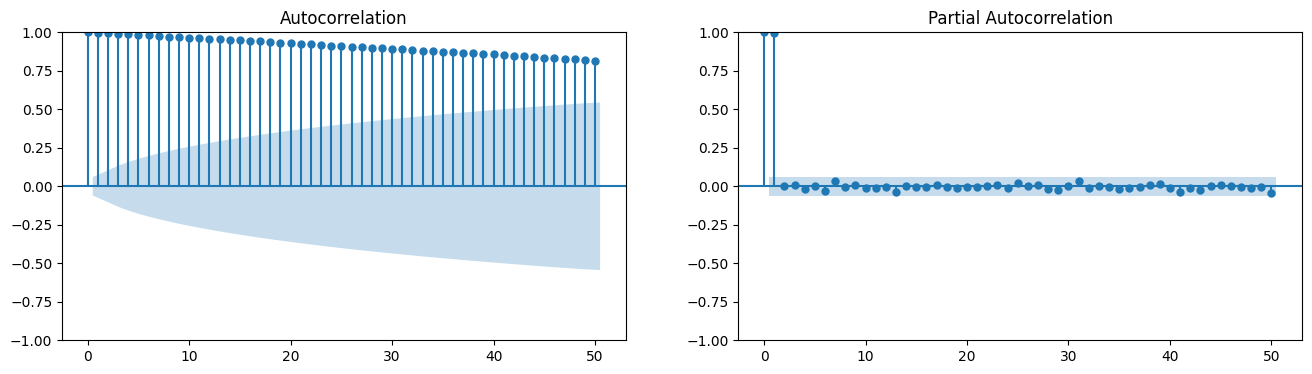

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ts = df['Close']
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(ts, lags=50, ax=axes[0])
plot_pacf(ts, lags=50, ax=axes[1])
plt.show()


In [75]:
import pmdarima as pm

pl = df['Close']
# Automatically determine the best parameters for ARIMA
model = pm.auto_arima(pl, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=5, # maximum p and q
                      m=1,              # frequency of series (if monthly, use 12)
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13958.534, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13954.538, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13956.536, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13956.539, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13956.305, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.522 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1071
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6975.269
Date:                Thu, 23 May 2024   AIC                          13954.538
Time:                        01:59:33   BIC                          13964.488
Sample:                             0   HQIC                         13958.307
                               - 1071                                  

In [76]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train = train_data['Close'].values
test = test_data['Close'].values

history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    output = model.fit().forecast()
    out = output[0]
    predictions.append(out)
    obs = test[t]
    history.append(obs)
mse = mean_squared_error(test, predictions)
print('Testing Mean Squared Error: ', mse)

Testing Mean Squared Error:  18651.343662102277


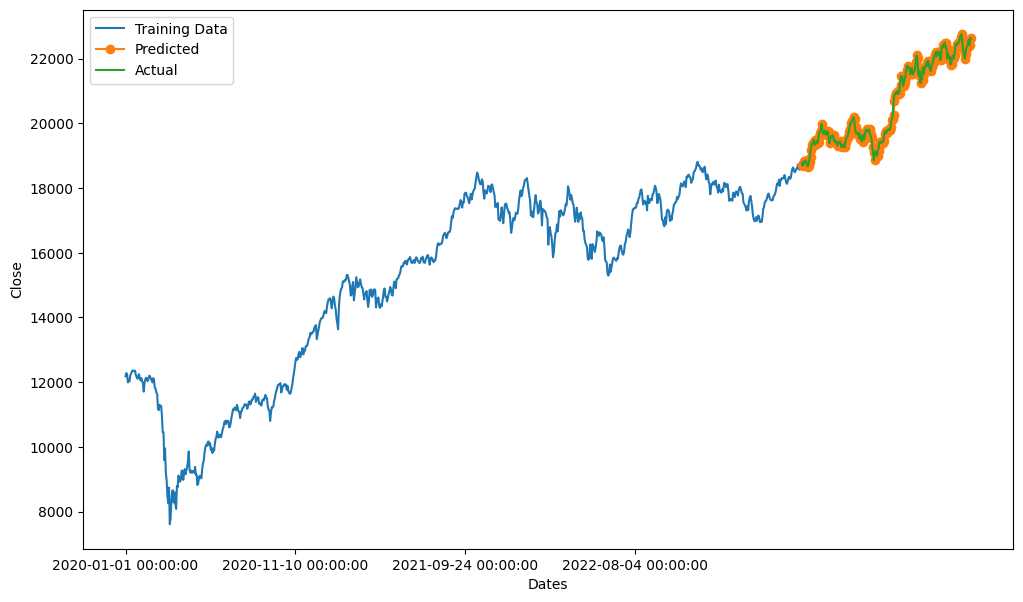

In [77]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'], label='Training Data')
plt.plot(test_data.index, predictions, marker='o', label='Predicted')
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.xlabel('Dates')
plt.ylabel('Close')
plt.xticks(np.arange(0,856, 215), df['Date'][0:856:215])
plt.legend()

In [78]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from sklearn.metrics import mean_squared_error
import transformers
import tensorflow as tf


In [79]:
df.head()

,Date,Close,20MA,100MA
0,2020-01-01,12182.500000,NaN,NaN
1,2020-01-02,12282.200195,NaN,NaN
2,2020-01-03,12226.650391,NaN,NaN
3,2020-01-06,11993.049805,NaN,NaN
4,2020-01-07,12052.950195,NaN,NaN


In [80]:
time_series = df['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series.reshape(-1, 1))

In [81]:
train_test_splits = []
train_test_splits.append((train_data, test_data))

In [83]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


In [84]:
X, y = create_sequences(scaled_data, seq_length=10)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [85]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [88]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# model.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1)))
# model.add(Dropout(0.2))

# #Second LSTM Layer
# model.add(LSTM(units = 64, return_sequences = True))
# model.add(Dropout(0.2))

# #Third LSTM Layer
# model.add(LSTM(units = 64, return_sequences = True))
# model.add(Dropout(0.2))

# #Forth LSTM Layer
# model.add(LSTM(units = 64))
# model.add(Dropout(0.2))


# #Output Layer(Dense)
# model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [89]:
model.fit(X_train, y_train, batch_size=1, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10

848/848 [==============================] - 18s 12ms/step - loss: 0.0036 - val_loss: 9.6444e-04
Epoch 2/10
848/848 [==============================] - 10s 12ms/step - loss: 9.6213e-04 - val_loss: 4.7552e-04
Epoch 3/10
848/848 [==============================] - 8s 10ms/step - loss: 7.7805e-04 - val_loss: 0.0018
Epoch 4/10
848/848 [==============================] - 8s 9ms/step - loss: 6.9458e-04 - val_loss: 4.2785e-04
Epoch 5/10
848/848 [==============================] - 7s 9ms/step - loss: 5.5304e-04 - val_loss: 1.8895e-04
Epoch 6/10
848/848 [==============================] - 7s 9ms/step - loss: 3.7007e-04 - val_loss: 2.5061e-04
Epoch 7/10
848/848 [==============================] - 7s 9ms/step - loss: 4.5490e-04 - val_loss: 1.3905e-04
Epoch 8/10
848/848 [==============================] - 8s 10ms/step - loss: 3.5685e-04 - val_loss: 1.6975e-04
Epoch 9/10
848/848 [==============================] - 8s 10ms/step - loss: 2.7971e-04 - val_loss: 1.3318e-04
Epoch 10/10
848/848 [=======

In [90]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_score = np.sqrt(mean_squared_error(y_train, train_predict))
print(f'Train RMSE: {train_score:.2f}')
test_score = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Test RMSE: {test_score:.2f}')


7/7 [==============================] - 0s 6ms/step
Train RMSE: 194.04
Test RMSE: 139.96


In [109]:
y_test.shape

(213, 1)

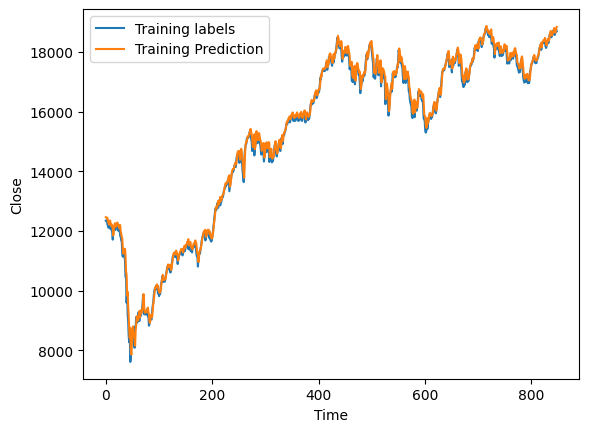

In [108]:
x = np.linspace(0, 848,848)

plt.plot(x, y_train, label='Training labels')
plt.plot(x, train_predict, label='Training Prediction')

plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

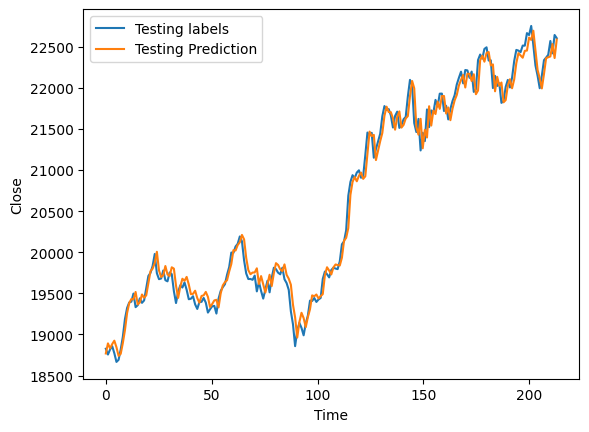

In [111]:
x = np.linspace(0, 213,213)

plt.plot(x, y_test, label='Testing labels')
plt.plot(x, test_predict, label='Testing Prediction')

plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()